**Template for ML Projects - STEPS for Reference**
1. Define the Problem
Objective: Clearly define the problem you want to solve.
Outcome: Determine the outcome you want to predict (e.g., classification, regression).
2. Data Collection
Gather Data: Collect data from various sources.
Data Relevance: Ensure the data is relevant to the problem.
3. Data Exploration and Cleaning
Exploratory Data Analysis (EDA): Use statistical summaries and visualization techniques to understand the data.
Handle Missing Values: Impute or remove missing values.
Remove Outliers: Identify and handle outliers.
Feature Engineering: Create new features from existing data if necessary.
4. Data Preprocessing
Data Transformation: Normalize or standardize the data.
Encoding Categorical Variables: Convert categorical data to numerical values (e.g., one-hot encoding).
Feature Scaling: Scale features to ensure they contribute equally to the model.
5. Feature Selection
Select Relevant Features: Choose the most relevant features that contribute to the predictive power of the model.(**Features Selection**
1. VIF - Variance Inflation Factor
2. RFE - Recursive Feature Engineering)
Dimensionality Reduction: Apply techniques like PCA if needed.
6. Data Splitting
Train-Test Split: Split the data into training and testing sets.
Cross-Validation: Further split the training set into folds for cross-validation to ensure the model's generalizability.
7. Choose a Model
Model Selection: Choose the appropriate machine learning algorithm(s) based on the problem and data characteristics.
Baseline Model: Start with a simple model to set a baseline for performance.
8. Model Training
Train the Model: Fit the model to the training data.
Hyperparameter Tuning: Optimize hyperparameters using techniques like grid search or random search.
9. Model Evaluation
Evaluate on Test Set: Assess the model's performance on the test data.
Performance Metrics: Use appropriate metrics (e.g., accuracy, precision, recall, F1 score, RMSE) to evaluate the model.


**Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


**Load Data**

In [2]:
# Reading dataset file
netflix_dataset = pd.read_csv("C:/Users/dhine/Desktop/ML/Projects/02 Self Project 1 - Netflix Recommendation/combined_data_1.txt", names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [3]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [4]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [5]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [6]:
netflix_dataset.shape

(24058263, 2)

In [7]:
#get the movie count count with NaN values
movie_count=netflix_dataset.isnull().sum()
movie_count = movie_count.values[1]
movie_count

4499

In [8]:
#to calculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()

In [9]:
customer_count

475257

In [10]:
#without NaN values
customer_count=netflix_dataset['Cust_Id'].nunique()-movie_count
customer_count

470758

In [11]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

24053764

In [12]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [13]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


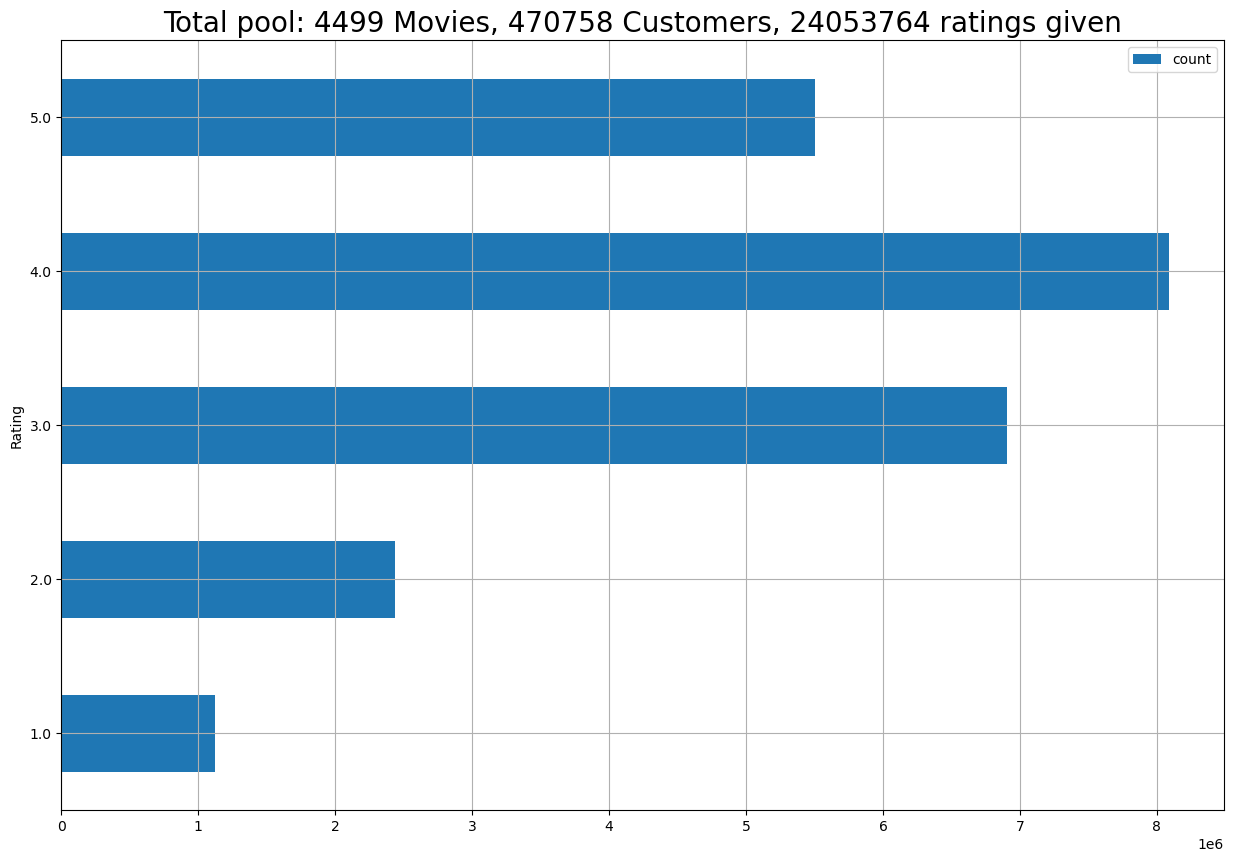

In [14]:
ax=stars.plot(kind='barh', legend=True, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [15]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [16]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [17]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [18]:
df_nan.shape

(4499, 1)

In [19]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [20]:
#now we will reset the index as the column
df_nan=df_nan.reset_index()

In [21]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [22]:
#To create a numpy array containing movie ids according the 'ratings' dataset
movie_np = []
movie_id = 1
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
last_record = np.full((1,len(netflix_dataset) - df_nan.iloc[-1,0]-1),movie_id)
movie_np=np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [23]:
len(movie_np)

24053764

In [24]:
len(netflix_dataset)

24058263

In [25]:
#To append the above created array to the datset after removing the 'nan' rows
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_Id']=movie_np.astype(int)
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset.head()

Now the dataset will look like: 


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [26]:
netflix_dataset.shape

(24053764, 3)

**Data Cleaning**

In [27]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers
f = ['count','mean']

In [28]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id').agg(f)
dataset_movie_summary

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
4495         614  1.321093e+06    614  3.478827
4496        9519  1.332006e+06   9519  3.763000
4497         714  1.330543e+06    714  2.715686
4498         269  1.262035e+06    269  2.464684
4499         428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [29]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(f)
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [30]:
#now we will store all the movie_id indexes in a variable dataset_movie_summary.index and convert the datatype to int
# dataset_movie_summary.index=dataset_movie_summary.index.map(int)

In [31]:
dataset_movie_summary['count'].quantile(0.7)

1798.6

In [32]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [33]:
dataset_movie_summary['count']

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [34]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int32', name='Movie_Id', length=3149)

In [35]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [36]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [37]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int32', name='Cust_Id', length=327300)

In [38]:
#we will remove all the customers and movies that are below the benchmark
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [39]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (17337458, 3)


In [40]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [41]:
#now we will prepare the dataset for SVD and it takes the matrix as the input
# so for input, we will convert the dataset into sparse matrix
#4499 movies
df_p = pd.pivot_table(netflix_dataset, values='Rating', index='Cust_Id', columns='Movie_Id')
print(df_p.shape)

(143458, 1350)


In [42]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Load the movies dataset**

In [43]:
df_title = pd.read_csv("C:/Users/dhine/Desktop/ML/Projects/02 Self Project 1 - Netflix Recommendation/movie_titles.csv", encoding = "ISO-8859-1", header = None,usecols=[0,1,2], names = ['Movie_Id', 'Year', 'Name'])
df_title.set_index('Movie_Id', inplace = True)
print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


In [44]:
!pip install scikit-surprise

In [45]:
#model building

import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [46]:
# Load Reader library
reader=Reader()

#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

svd=SVD()
cross_validate(svd, data, measures=['RMSE','MAE'], cv=3, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0009  0.9978  0.9944  0.9977  0.0026  
MAE (testset)     0.8050  0.8028  0.8039  0.8039  0.0009  
Fit time          1.22    1.21    1.20    1.21    0.01    
Test time         0.30    0.39    0.41    0.37    0.05    


{'test_rmse': array([1.00087206, 0.9978157 , 0.99442427]),
 'test_mae': array([0.80500498, 0.80278997, 0.80391804]),
 'fit_time': (1.2199184894561768, 1.2088062763214111, 1.200361967086792),
 'test_time': (0.30024242401123047, 0.3906362056732178, 0.40509676933288574)}

In [47]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [48]:
##To find all the movies rated as 5 stars by user with userId = 712664

dataset_712664=netflix_dataset[(netflix_dataset['Cust_Id'] ==712664)& (netflix_dataset['Rating']==5)]
dataset_712664=dataset_712664.set_index('Movie_Id')
dataset_712664=dataset_712664.join(df_title)['Name']
dataset_712664

Movie_Id
3                       Character
79                    The Killing
175                Reservoir Dogs
199               The Deer Hunter
241            North by Northwest
                  ...            
3887    Aguirre: The Wrath of God
4109              American Psycho
4266    The Passion of the Christ
4384             Dawn of the Dead
4392             Army of Darkness
Name: Name, Length: 84, dtype: object

In [49]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [50]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change
#the values in the copied dataset, not in the actual dataset

user_712664=df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [51]:
user_712664=user_712664.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [52]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [53]:
user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)
user_712664=user_712664.drop('Movie_Id', axis=1)

In [54]:
user_712664=user_712664.sort_values('Estimate_Score')
print(user_712664)

        Year                        Name  Estimate_Score
15    1996.0                   Screamers        3.079985
25    2004.0             Never Die Alone        3.171315
16    2005.0                   7 Seconds        3.288399
7     2004.0  What the #$*! Do We Know!?        3.523610
17    1994.0            Immortal Beloved        3.527713
...      ...                         ...             ...
8032  1992.0                 Bebe's Kids        3.761210
8020  1980.0  Why Didn't They Ask Evans?        3.761210
29    2003.0      Something's Gotta Give        3.904743
2     1997.0                   Character        4.284208
27    2002.0             Lilo and Stitch        4.290857

[14621 rows x 3 columns]


In [55]:
user_712664=user_712664.sort_values('Estimate_Score', ascending=False)
print(user_712664.head(10))

      Year                            Name  Estimate_Score
27  2002.0                 Lilo and Stitch        4.290857
2   1997.0                       Character        4.284208
29  2003.0          Something's Gotta Give        3.904743
76  1995.0                           Congo        3.761210
43  1996.0                  Spitfire Grill        3.761210
44  1999.0                 The Love Letter        3.761210
45  1964.0  Rudolph the Red-Nosed Reindeer        3.761210
46  1952.0       The Bad and the Beautiful        3.761210
47  2001.0                  Justice League        3.761210
51  2002.0         The Weather Underground        3.761210


In [56]:
##Function to predict movies with high ratings for any user

In [57]:
def predict_movies(userID):
    userID = int(userID)
    user = df_title.copy()
    user = user.reset_index()
    #Predict the ratings 
    user['Estimate_Score'] = user['Movie_Id'].apply(lambda x: svd.predict(userID, x).est)
    #Drop extra columns from the user data frame
    user = user.drop('Movie_Id', axis = 1)
    # Sort predicted ratings in descending order
    user = user.sort_values('Estimate_Score', ascending=False)
    #Print top 10 recommendations
    print(user.head(10))

In [58]:
predict_movies(9981)

         Year                                     Name  Estimate_Score
27     2002.0                          Lilo and Stitch        3.788418
17     1994.0                         Immortal Beloved        3.740296
2      1997.0                                Character        3.677824
29     2003.0                   Something's Gotta Give        3.675293
11846  2005.0                            Dust to Glory        3.607692
11851  1991.0                Return to the Blue Lagoon        3.607692
11850  1946.0                             The Yearling        3.607692
11849  2003.0  Dumb and Dumberer: When Harry Met Lloyd        3.607692
11848  1998.0                                    Earth        3.607692
11847  1997.0                     For Richer or Poorer        3.607692
